<h1 align='center'>Model: General and PCA for classification</h1><>

## Importing Libraries

This code cell imports the necessary Python libraries for data manipulation, analysis, and visualization.

- `pandas` (as `pd`): Used for working with data structures like DataFrames.
- `numpy` (as `np`): Used for numerical operations, especially with arrays and matrices.
- `scipy` (as `sp`): Used for scientific and technical computing.
- `math` (as `mt`): Provides mathematical functions.
- `matplotlib.pyplot` (as `plt`): Used for creating static, interactive, and animated visualizations in Python.
- `seaborn` (as `sns`): A statistical data visualization library based on Matplotlib.
- `sklearn.impute.SimpleImputer`: Used for handling missing values in the dataset.

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

## Loading the Dataset

This code cell loads the dataset named "arrhythmia.csv" into a pandas DataFrame. The `header=None` argument is used because the dataset does not contain a header row.

In [ ]:
#loading the required dataset without the header
df=pd.read_csv("Data/arrhythmia.csv", header=None)

## Inspecting the Dataset

This code cell displays the first 5 rows of the DataFrame using the `.head()` method. This is a quick way to get a glimpse of the data and its structure.

In [ ]:
#inspecting the first 5 rows of the column
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


## Inspecting the last 5 rows of the Dataset

This code cell displays the last 5 rows of the DataFrame using the `.tail()` method. This is a quick way to get a glimpse of the end of the data and its structure.

In [ ]:
#Inspecting the last 5 rows of the dataset
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [ ]:
#Inspecting the dimensionality of the dataset
df.shape

(452, 280)

In [ ]:
#Obtaining the information associated with the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [ ]:
#Obtaining a brief description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.00,47.00,58.000,83.0
1,452.0,0.550885,0.497955,0.0,0.00,1.00,1.000,1.0
2,452.0,166.188053,37.170340,105.0,160.00,164.00,170.000,780.0
3,452.0,68.170354,16.590803,6.0,59.00,68.00,79.000,176.0
4,452.0,88.920354,15.364394,55.0,80.00,86.00,94.000,188.0
...,...,...,...,...,...,...,...,...
275,452.0,0.514823,0.347531,-0.8,0.40,0.50,0.700,2.4
276,452.0,1.222345,1.426052,-6.0,0.50,1.35,2.100,6.0
277,452.0,19.326106,13.503922,-44.2,11.45,18.10,25.825,88.8
278,452.0,29.473230,18.493927,-38.6,17.55,27.90,41.125,115.9


## Checking for Null Values

This code cell calculates and displays the total number of null values in the DataFrame using `pd.isnull().sum().sum()`.

In [ ]:
#Checking for null values in the dataset
pd.isnull(df).sum().sum()

np.int64(0)

## Replacing "?" with NaN

This code cell replaces all occurrences of the string "?" in the DataFrame with `np.nan` (Not a Number), which is the standard representation for missing values in NumPy and pandas.

In [ ]:
#Replacing the "?" in the with the (numpy)np.nan method
df = df.replace("?",np.nan)

## Final Count of Null Values

This code cell calculates and displays the total number of null values in the DataFrame after replacing "?" with `np.nan`.

In [ ]:
#Final counting total number of null values in dataset
nu=pd.isnull(df).sum().sum()
nu

np.int64(408)

## Visualizing the Distribution of Missing Data

This code cell generates a line plot showing the number of null values in each column of the DataFrame.

Text(0, 0.5, 'Total number of null values in each column')

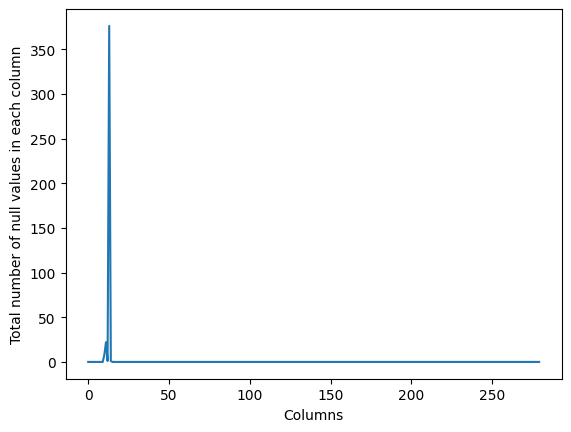

In [ ]:
#Plotting the graph to check for the null data
pd.isnull(df).sum().plot()
plt.xlabel("Columns")
plt.ylabel("Total number of null values in each column")

## Zooming Into Missing Value Distribution (Bar Chart)

This code cell generates a bar chart showing the number of null values for a specific range of columns (columns 7 to 16), providing a zoomed-in view of the missing data distribution.

Text(0, 0.5, 'Total number of null values in each columns')

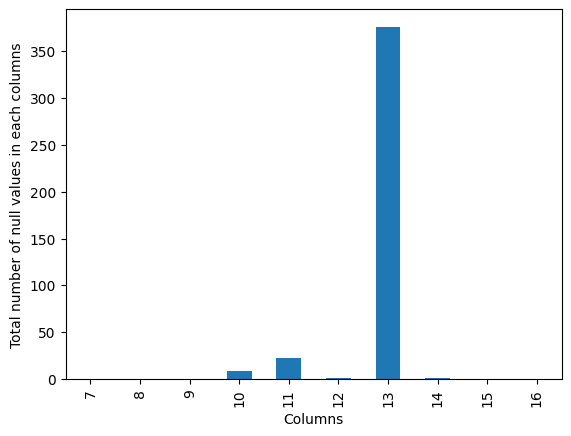

In [ ]:
#Zooming Into the null value graph (as bar chart)
pd.isnull(df).sum()[7:17].plot(kind="bar")
plt.xlabel("Columns")
plt.ylabel("Total number of null values in each columns")

## Dropping Column 13

This code cell drops the column with index 13 from the DataFrame in place.

In [ ]:
#Dropping the column 13
df.drop(columns =13, inplace=True)

## Creating a Copy of the DataFrame

This code cell creates a copy of the DataFrame `df` and assigns it to a new variable `new_df`. This is done to preserve the original data while performing imputation on the copied data.

In [ ]:
#Making a copy to avoid changing original data (When imputing)
new_df = df.copy()

## Marking Columns with Missing Values

This code cell iterates through the columns of `new_df` and creates boolean columns indicating whether each value in the original column was missing (True) or not (False).

In [ ]:
#Makin new colums indicating what will be imputed
cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

## Imputing Missing Values with the Mean

This code cell uses `SimpleImputer` with the default strategy (mean for numerical data) to fill the missing values (represented by `np.nan`) in the `new_df` DataFrame. It then converts the result back to a pandas DataFrame and assigns the original column names.

In [ ]:
#Imputation
#my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

## Displaying the Imputed DataFrame

This code cell displays the first 5 rows of the `new_df` DataFrame after the missing values have been imputed.

In [ ]:
#Imputed dataframe
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


## Verifying No Null Values After Imputation

This code cell calculates and displays the total number of null values in the `new_df` DataFrame after imputation to confirm that all missing values have been handled.

In [ ]:
#Dataset with zero null values
pd.isnull(new_df).sum().sum()

np.int64(0)

## Creating Column Names

This code cell defines a list of strings `final_df_columns` which will be used as the column names for the DataFrame.

In [ ]:
#Creating column names

final_df_columns = ["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom",
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

## Assigning Column Names and Saving to CSV

This code cell assigns the `final_df_columns` list as the column names for the `new_df` DataFrame and then saves the modified DataFrame to a new CSV file named "new data with target class.csv". Finally, it displays the first 5 rows of the DataFrame with the new column names.

In [ ]:
# Adding column names to dataset
new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


## Separating Target Variable

This code cell separates the target variable ('class') from the features in the `new_df` DataFrame. The 'class' column is assigned to the `target` variable, and the remaining columns are assigned to the `final_df` variable.

In [ ]:
target=new_df["class"]
final_df = new_df.drop(columns = 'class')

## Displaying Shape of Feature DataFrame

This code cell displays the shape (number of rows and columns) of the `final_df` DataFrame, which now contains only the features.

In [ ]:
final_df.shape

(452, 278)

## Defining Class Names

This code cell defines a list of strings `class_names` that correspond to the different classes in the dataset.

In [ ]:
#List with class names

class_names = ["Normal",
               "Ischemic changes (CAD)",
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy",
               "Sinus bradycardy",
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

## Sorting DataFrame by Class

This code cell sorts the `new_df` DataFrame based on the 'class' column and assigns the sorted DataFrame to the variable `t`.

In [ ]:
t = new_df.sort_values(by=["class"])

## Counting Instances per Class

This code cell counts the number of occurrences for each unique value in the 'class' column of the sorted DataFrame `t` and converts the result to a list `la`.

In [ ]:
#Counting the number of instances for each class
la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

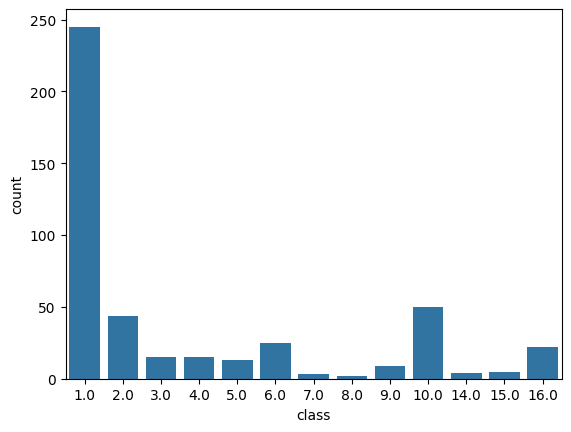

In [ ]:
sns.countplot(x = "class",data=new_df)
plt.show()

In [ ]:
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


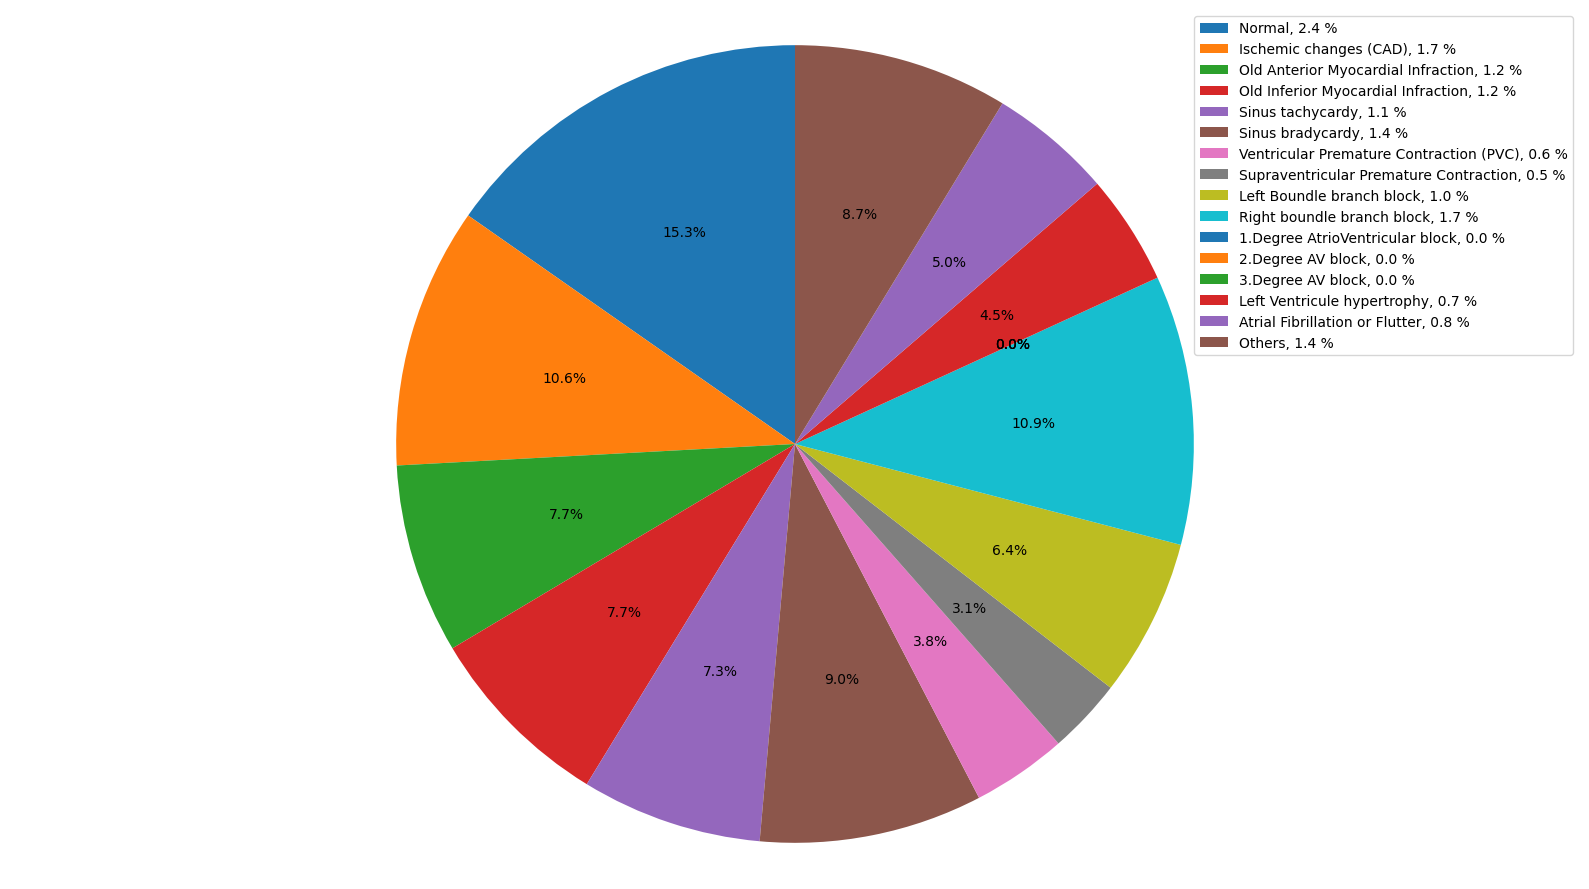

In [ ]:
labels = class_names
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

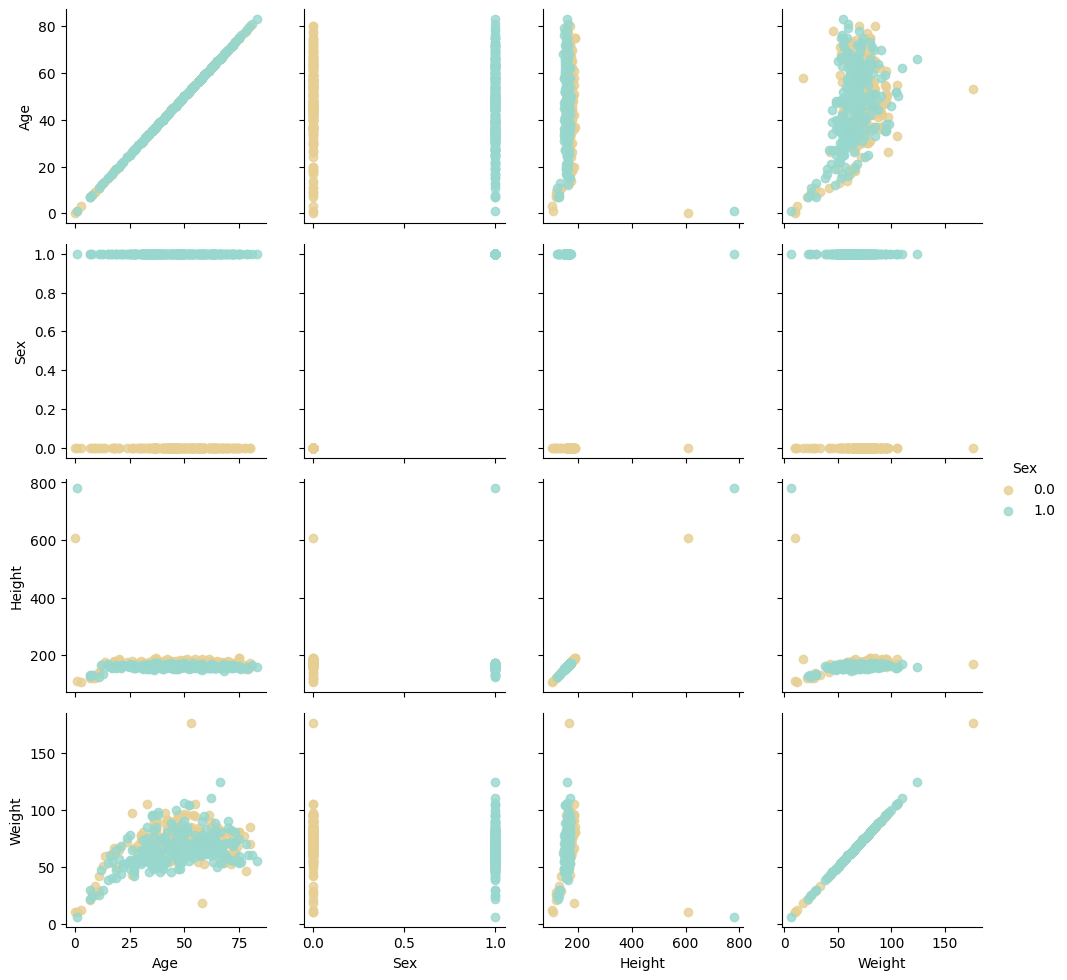

In [ ]:
g=sns.PairGrid(final_df, vars=['Age','Sex','Height','Weight'], hue='Sex', palette="BrBG")
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [ ]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

In [ ]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [ ]:
sorted(final_df['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

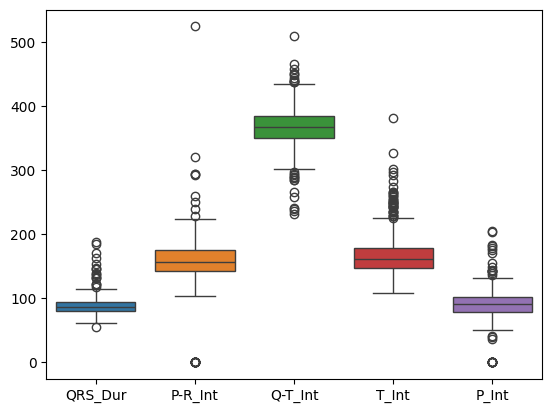

In [ ]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

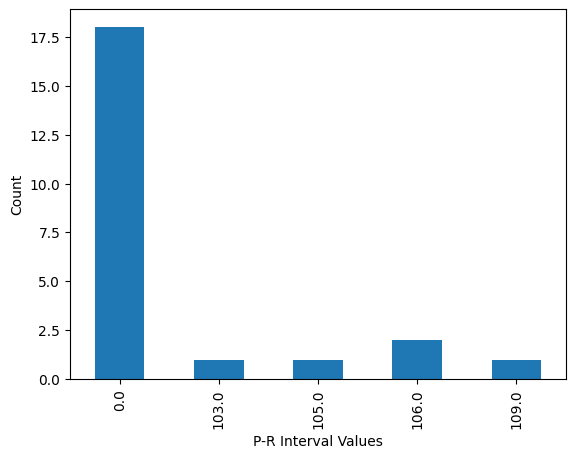

In [ ]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

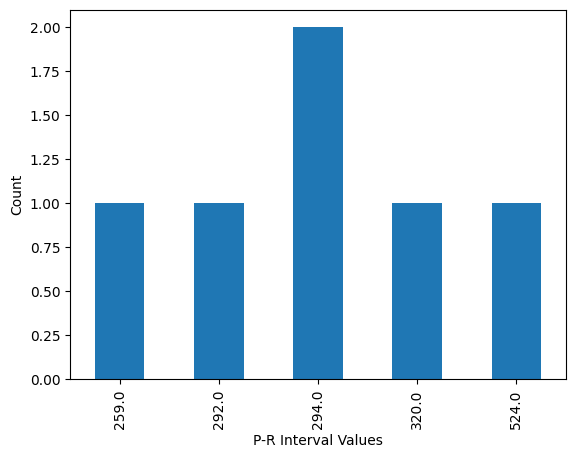

In [ ]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

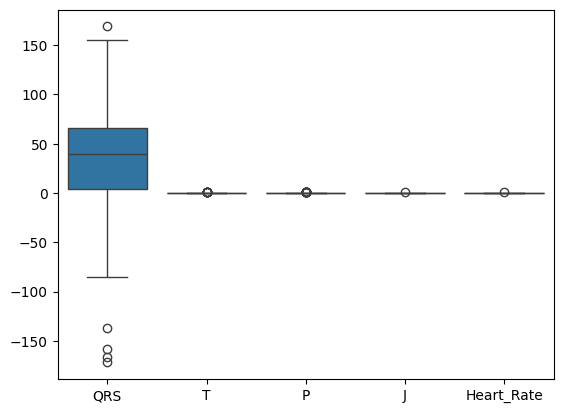

In [ ]:
sns.boxplot(data=final_df[["QRS","T","P","J","Heart_Rate"]]);

<Axes: >

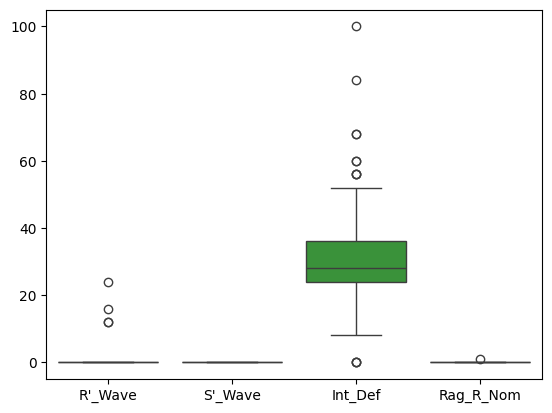

In [ ]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]])

In [ ]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

S'_Wave
0.0    452
Name: count, dtype: int64

In [ ]:
final_df["V101"].value_counts().sort_index(ascending=False)

V101
216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: count, dtype: int64

In [ ]:
final_df["V201"].value_counts().sort_index(ascending=False)

V201
216.0     1
136.0     1
84.0      1
72.0      1
60.0      5
56.0      4
52.0     12
48.0     19
44.0     53
40.0     68
36.0     74
32.0     69
28.0     48
24.0     39
20.0     15
16.0      6
12.0      2
0.0      34
Name: count, dtype: int64

In [ ]:
final_df["V301"].value_counts().sort_index(ascending=False)

V301
132.0     1
88.0      2
76.0      2
72.0      1
68.0      2
64.0      3
60.0     16
56.0     26
52.0     57
48.0     68
44.0     76
40.0     74
36.0     49
32.0     32
28.0     13
24.0      4
20.0      6
16.0      1
0.0      19
Name: count, dtype: int64

In [ ]:
final_df["V501"].value_counts().sort_index(ascending=False)

V501
136.0      1
120.0      2
116.0      1
108.0      1
96.0       1
92.0       1
84.0       1
76.0       2
72.0       3
68.0       4
64.0       5
60.0       9
56.0      22
52.0      67
48.0     105
44.0     104
40.0      73
36.0      29
32.0      12
28.0       3
24.0       2
20.0       1
0.0        3
Name: count, dtype: int64

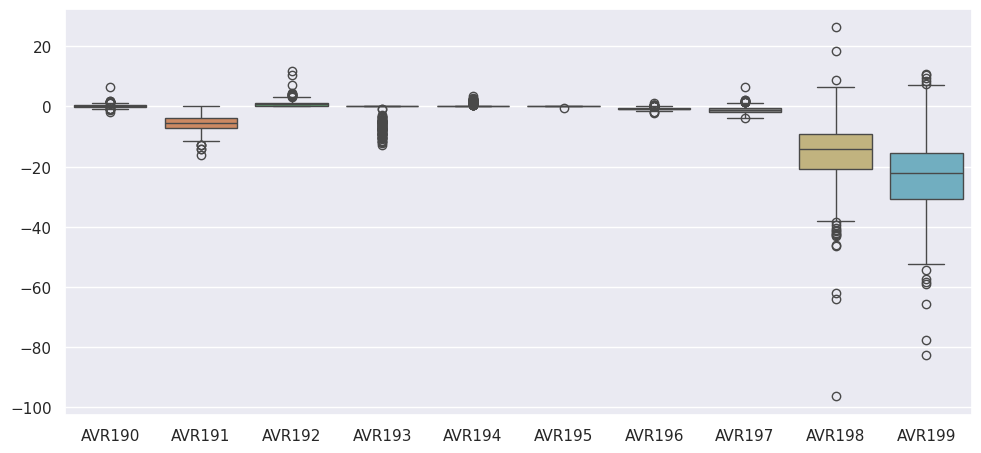

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

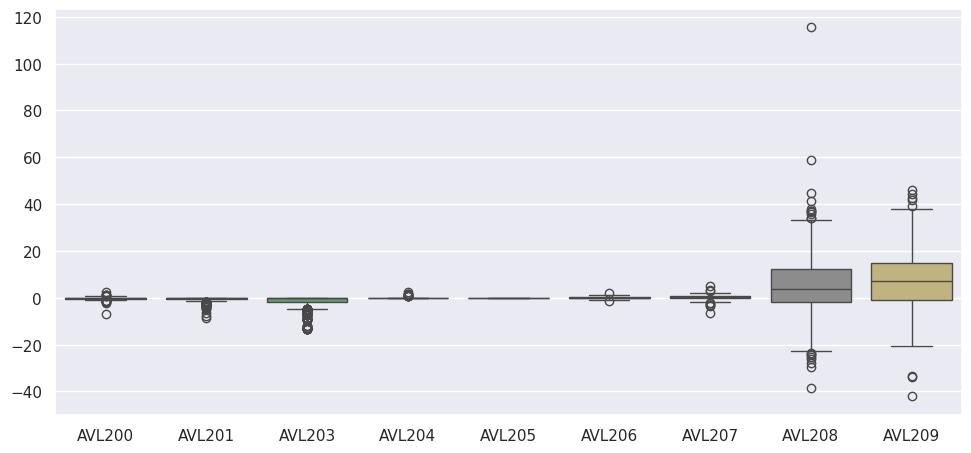

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL203","AVL203","AVL204","AVL205",
                           "AVL206","AVL207","AVL208","AVL209"]]);

<Axes: >

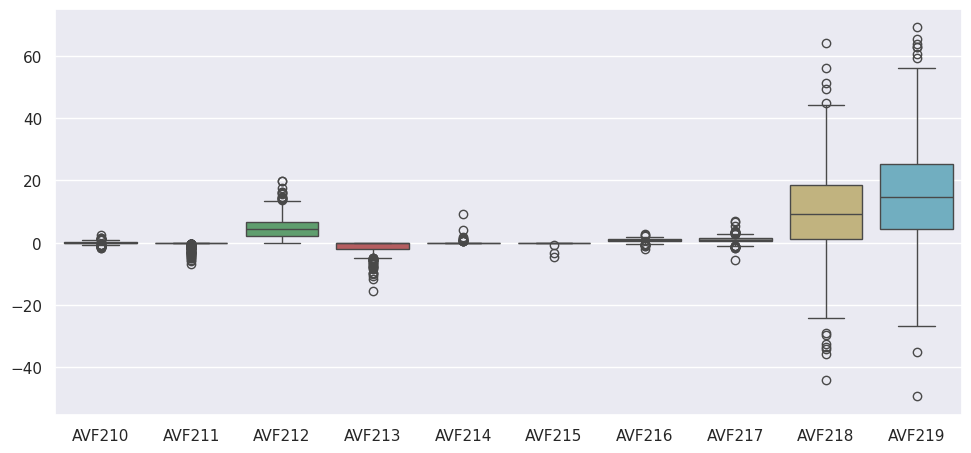

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213","AVF214",
                           "AVF215","AVF216","AVF217","AVF218","AVF219"]])

In [ ]:
target=new_df["class"]
pearsoncorr = final_df.corrwith(other=target,method='pearson')
pearsoncorr.values

/media/heytanix/Shared/JupyterLabEnvironment/Jupyter3_13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/media/heytanix/Shared/JupyterLabEnvironment/Jupyter3_13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([-9.23812218e-02, -1.78080037e-01, -3.46671442e-02, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02, -1.68648870e-04,  1.90644217e-01,
       -3.08114850e-02,  3.33672764e-02,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  

## Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df,target,test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Evaluation Strategy

In [ ]:
# importing evaluation metrices.

from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix

## Modeling

In [ ]:
result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

## KNN Classifier Implementation

This code cell implements a K-Nearest Neighbors (KNN) classifier. It initializes the `KNeighborsClassifier`, fits the model to the training data, and makes predictions on the testing data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

## Evaluating KNN Classifier

This code cell calculates the training and testing accuracy scores for the KNN classifier and appends these results to the `result` DataFrame.

In [ ]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))

result = pd.concat([result, pd.Series({'Model':'KNN Classifier','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_test_accuracy}).to_frame().T], ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352


## Logistic Regression Implementation

This code cell implements a Logistic Regression classifier. It initializes the `LogisticRegression` model with specified parameters, fits the model to the training data, and makes predictions on the testing data.

In [ ]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(solver = 'saga',random_state=0)
lgclassifier.fit(X_train,y_train)
y_pred = lgclassifier.predict(X_test)

## Evaluating Logistic Regression

This code cell calculates the training and testing accuracy and weighted recall scores for the Logistic Regression model and appends the accuracy scores to the `result` DataFrame.

In [ ]:
lg_train_recall = recall_score(y_train, lgclassifier.predict(X_train),average='weighted')
lg_test_recall = recall_score(y_test, lgclassifier.predict(X_test),average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))
result = pd.concat([result, pd.Series({'Model':'Logestic Regression','Train Accuracy':lg_train_accuracy,'Test Accuracy':lg_test_accuracy}).to_frame().T], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022


## Decision Tree Classifier Implementation

This code cell implements a Decision Tree Classifier. It initializes the `DecisionTreeClassifier` with specified parameters, fits the model to the training data, and makes predictions on both the training and testing data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
dtclassifier.fit(X_train,y_train)
y_pred_test=dtclassifier.predict(X_test)
y_pred_train=dtclassifier.predict(X_train)

## Evaluating Decision Tree Classifier

This code cell calculates the training and testing accuracy scores for the Decision Tree Classifier and appends these results to the `result` DataFrame.

In [ ]:
dt_train_accuracy = accuracy_score(y_train,y_pred_train )
dt_test_accuracy = accuracy_score(y_test, y_pred_test)
result = pd.concat([result, pd.Series({'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy}).to_frame().T], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319


## Linear SVM Implementation

This code cell implements a Linear Support Vector Machine (SVM) classifier. It initializes the `LinearSVC` model with a specified parameter, fits the model to the training data, and makes predictions on the training data.

In [ ]:
from sklearn.svm import LinearSVC
lsvclassifier = LinearSVC(C=0.01)
lsvclassifier.fit(X_train, y_train)
y_pred = lsvclassifier.predict(X_train)

## Evaluating Linear SVM

This code cell calculates the training and testing accuracy scores for the Linear SVM classifier (using the predictions from the Decision Tree Classifier for the test set) and appends these results to the `result` DataFrame.

In [ ]:
lsvc_train_accuracy_score = accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy_score = accuracy_score(y_test, y_pred_test)

result = pd.concat([result, pd.Series({'Model':'Linear SVM','Train Accuracy':lsvc_train_accuracy_score,'Test Accuracy':lsvc_test_accuracy_score}).to_frame().T], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.789474,0.681319


## Kernelized SVM Implementation

This code cell implements a Kernelized Support Vector Machine (SVM) classifier with a sigmoid kernel. It initializes the `SVC` model with specified parameters, fits the model to the training data, and makes predictions on both the training and testing data.

In [ ]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid', C=10, gamma=0.01)
KSVC_clf.fit(X_train, y_train)
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

## Evaluating Kernelized SVM

This code cell calculates the training and testing accuracy scores for the Kernelized SVM classifier and appends these results to the `result` DataFrame.

In [ ]:
ksvc_train_accuracy_score = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy_score = accuracy_score(y_test, y_pred_test)

result = pd.concat([result, pd.Series({'Model':'Kernalized SVM','Train Accuracy':ksvc_train_accuracy_score,'Test Accuracy':ksvc_test_accuracy_score}).to_frame().T], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.789474,0.681319
4,Kernalized SVM,0.689751,0.725275


## Random Forest Classifier Implementation

This code cell implements a Random Forest Classifier. It initializes the `RandomForestClassifier` with specified parameters and fits the model to the training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300 , criterion='gini', max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

## Evaluating Random Forest Classifier

This code cell makes predictions on the training and testing data using the trained Random Forest Classifier, calculates the accuracy scores, and appends these results to the `result` DataFrame.

In [ ]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_accuracy_score = accuracy_score(y_train, y_pred_train)
rf_test_accuracy_score = accuracy_score(y_test, y_pred_test)

result = pd.concat([result, pd.Series({'Model':'Random Forest Classifier','Train Accuracy':rf_train_accuracy_score,'Test Accuracy':rf_test_accuracy_score}).to_frame().T], ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.789474,0.681319
4,Kernalized SVM,0.689751,0.725275
5,Random Forest Classifier,0.897507,0.747253


## Performing Random Over Sampling

This code cell uses `RandomOverSampler` from the `imblearn` library to oversample the minority classes in the dataset. This helps to address class imbalance. The resampled features and target variable are stored in `X_resampled` and `y_resampled` respectively.

In [ ]:
#performing over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(final_df, target)
X_resampled.shape

(3185, 278)

## Counting Instances per Class After Oversampling

This code cell uses `collections.Counter` to count the number of instances for each class in the oversampled target variable `y_resampled` and displays the counts.

In [ ]:
#finding frequency of each class
import collections
counter = collections.Counter(y_resampled)
counter

Counter({8.0: 245,
         6.0: 245,
         10.0: 245,
         1.0: 245,
         7.0: 245,
         14.0: 245,
         3.0: 245,
         16.0: 245,
         2.0: 245,
         4.0: 245,
         5.0: 245,
         9.0: 245,
         15.0: 245})

## Visualizing Class Distribution After Oversampling

This code cell generates a count plot to visualize the distribution of instances across different classes after random oversampling. The y-axis limit is set to 200 and the x-axis limit to 10 for better visualization.

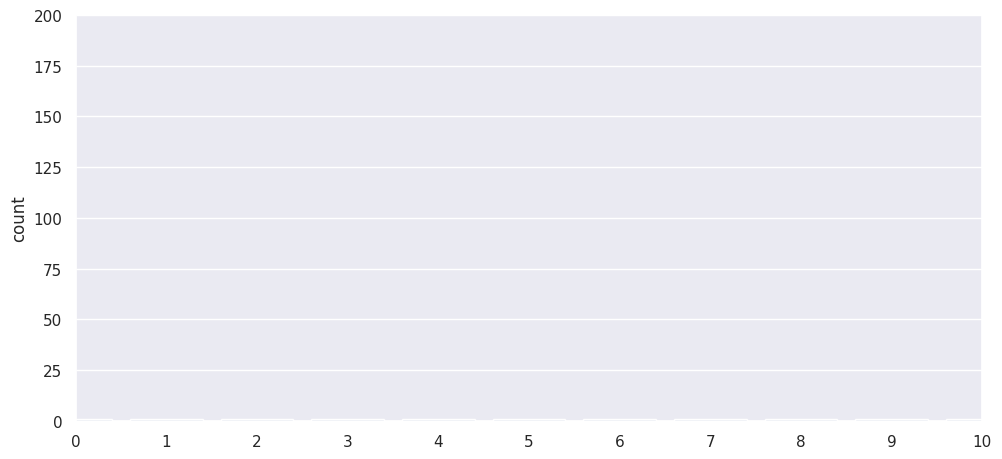

In [ ]:
sns.countplot(y_resampled)
plt.ylim(0, 200)
plt.xlim(0, 10.0)
plt.show()

## Splitting Oversampled Data

This code cell splits the oversampled data (`X_resampled` and `y_resampled`) into training and testing sets using `train_test_split`.

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

## Scaling Oversampled Data

This code cell uses the previously fitted `StandardScaler` to transform the oversampled training and testing data.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

## Applying PCA

This code cell applies Principal Component Analysis (PCA) to the scaled training and testing data (`X_train` and `X_test`). PCA is used for dimensionality reduction, keeping components that explain 98% of the variance.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.98)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Applying PCA to Oversampled Data

This code cell applies the previously fitted PCA transformation to the scaled oversampled training and testing data (`X_train1` and `X_test1`).

In [ ]:
x_train1 = pca.transform(X_train1)
X_test1 = pca.transform(X_test1)

## KNN Classifier with PCA Implementation

This code cell implements a K-Nearest Neighbors (KNN) classifier on the data that has been reduced using PCA. It initializes the `KNeighborsClassifier`, fits the model to the PCA-transformed training data, and makes predictions on the PCA-transformed testing data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier()
classifier.fit(X_train_pca, y_train)
Y_pred = classifier.predict(X_test_pca)

## Evaluating KNN Classifier with PCA

This code cell calculates the training and testing accuracy scores for the KNN classifier trained on PCA-transformed data and stores these results.

In [ ]:
train_accuracy = accuracy_score(y_train, classifier.predict(X_train_pca))
test_accuracy = accuracy_score(y_test, Y_pred)

## Appending KNN with PCA Results

This code cell creates a new row with the model name 'Knn with PCA' and its corresponding training and testing accuracy scores, and then appends this row to the `result` DataFrame.

In [ ]:
new_row = pd.Series({
    'Model': 'Knn with PCA',
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})
result = pd.concat([result, new_row.to_frame().T], ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.789474,0.681319
4,Kernalized SVM,0.689751,0.725275
5,Random Forest Classifier,0.897507,0.747253
6,Knn with PCA,0.645429,0.648352


## Logistic Regression with PCA Implementation

This code cell implements a Logistic Regression classifier on the PCA-reduced data. It initializes the `LogisticRegression` model with specified parameters, fits the model to the PCA-transformed training data, and makes predictions on the PCA-transformed testing data.

In [ ]:
from sklearn.linear_model import LogisticRegression
lgp_classifier = LogisticRegression(C=10, random_state=0)
lgp_classifier.fit(X_train_pca, y_train)
y_pred_test = lgp_classifier.predict(X_test_pca)

## Evaluating Logistic Regression with PCA & Appending Logistic Regression with PCA Results

- This code cell calculates the training and testing accuracy scores for the Logistic Regression model trained on PCA-transformed data and stores these results.
- This code cell creates a new row with the model name 'Logestic Regression PCA' and its corresponding training and testing accuracy scores, and then appends this row to the `result` DataFrame.

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

lgp_train_accuracy = accuracy_score(y_train, lgp_classifier.predict(X_train_pca))
lgp_test_accuracy = accuracy_score(y_test, y_pred_test)

new_row = pd.Series({
    'Model': 'Logestic Regression PCA',
    'Train Accuracy': lgp_train_accuracy,
    'Test Accuracy': lgp_test_accuracy
})
result = pd.concat([result, new_row.to_frame().T], ignore_index=True)

result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.789474,0.681319
4,Kernalized SVM,0.689751,0.725275
5,Random Forest Classifier,0.897507,0.747253
6,Knn with PCA,0.645429,0.648352
7,Logestic Regression PCA,1.0,0.659341


## Decision Tree Classifier with PCA Implementation

This code cell implements a Decision Tree Classifier on the PCA-reduced data. It initializes the `DecisionTreeClassifier` with specified parameters, fits the model to the PCA-transformed training data, and makes predictions on both the PCA-transformed training and testing data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtpclassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtpclassifier.fit(X_train_pca, y_train)
y_pred_train = dtpclassifier.predict(X_train_pca)
y_pred_test = dtpclassifier.predict(X_test_pca)

## Evaluating Decision Tree Classifier with PCA

This code cell calculates the training and testing accuracy and weighted recall scores for the Decision Tree Classifier trained on PCA-transformed data and stores these results.

In [ ]:
from sklearn.metrics import recall_score, accuracy_score
dtp_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
dtp_train_accuracy_score = accuracy_score(y_train, y_pred_train)
dtp_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
dtp_test_accuracy_score = accuracy_score(y_test, y_pred_test)

## Appending Decision Tree Classifier with PCA Results

This code cell creates a new row with the model name 'Decision Tree with PCA' and its corresponding training and testing accuracy scores, and then appends this row to the `result` DataFrame.

In [ ]:
import pandas as pd
new_row = pd.Series({
    'Model': 'Decision Tree with PCA',
    'Train Accuracy': dtp_train_accuracy_score,
    'Test Accuracy': dtp_test_accuracy_score
})
result = pd.concat([result, new_row.to_frame().T], ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.789474,0.681319
4,Kernalized SVM,0.689751,0.725275
5,Random Forest Classifier,0.897507,0.747253
6,Knn with PCA,0.645429,0.648352
7,Logestic Regression PCA,1.0,0.659341
8,Decision Tree with PCA,1.0,0.516484


## Linear SVM with PCA Implementation

This code cell implements a Linear Support Vector Machine (SVM) classifier on the PCA-reduced data. It initializes the `SVC` model with a linear kernel and probability enabled, fits the model to the PCA-transformed training data, and makes predictions on the PCA-transformed testing data.

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0, probability=True)
classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)

## Evaluating Linear SVM with PCA & Appending Linear SVM with PCA Results

- This code cell calculates the training and testing accuracy scores for the Linear SVM classifier trained on PCA-transformed data and stores these results.
- This code cell creates a new row with the model name 'Linear SVM with PCA' and its corresponding training and testing accuracy scores, and then appends this row to the `result` DataFrame.

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd
lsvcp_train_accuracy = accuracy_score(y_train, classifier.predict(X_train_pca))
lsvcp_test_accuracy = accuracy_score(y_test, y_pred)
new_row = pd.Series({
    'Model': 'Linear SVM with PCA',
    'Train Accuracy': lsvcp_train_accuracy,
    'Test Accuracy': lsvcp_test_accuracy
})
result = pd.concat([result, new_row.to_frame().T], ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.789474,0.681319
4,Kernalized SVM,0.689751,0.725275
5,Random Forest Classifier,0.897507,0.747253
6,Knn with PCA,0.645429,0.648352
7,Logestic Regression PCA,1.0,0.659341
8,Decision Tree with PCA,1.0,0.516484
9,Linear SVM with PCA,1.0,0.703297


## Kernelized SVM with PCA Implementation

This code cell implements a Kernelized Support Vector Machine (SVM) classifier with an RBF kernel on the PCA-reduced data. It initializes the `SVC` model with specified parameters, fits the model to the PCA-transformed training data, and makes predictions on both the PCA-transformed training and testing data.

In [ ]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='rbf', C=1, gamma=0.1)
KSVC_clf.fit(X_train_pca, y_train)
y_pred_train1 = KSVC_clf.predict(X_train_pca)
y_pred_test1 = KSVC_clf.predict(X_test_pca)

## Evaluating Kernelized SVM with PCA & Appending Kernelized SVM with PCA Results

- This code cell calculates the training and testing accuracy scores for the Kernelized SVM classifier trained on PCA-transformed data and stores these results.
- This code cell creates a new row with the model name 'Kernelized SVM with PCA' and its corresponding training and testing accuracy scores, and then appends this row to the `result` DataFrame.

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd
ksvcp_train_accuracy_score = accuracy_score(y_train, y_pred_train1)
ksvcp_test_accuracy_score = accuracy_score(y_test, y_pred_test1)
new_row = pd.Series({
    'Model': 'Kernelized SVM with PCA',
    'Train Accuracy': ksvcp_train_accuracy_score,
    'Test Accuracy': ksvcp_test_accuracy_scoreX_train
})
result = pd.concat([result, new_row.to_frame().T], ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.789474,0.681319
4,Kernalized SVM,0.689751,0.725275
5,Random Forest Classifier,0.897507,0.747253
6,Knn with PCA,0.645429,0.648352
7,Logestic Regression PCA,1.0,0.659341
8,Decision Tree with PCA,1.0,0.516484
9,Linear SVM with PCA,1.0,0.703297


## Random Forest with PCA Implementation

This code cell implements a Random Forest Classifier on the PCA-reduced data. It initializes the `RandomForestClassifier` with default parameters and fits the model to the PCA-transformed training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfp_clf = RandomForestClassifier()
rfp_clf.fit(X_train_pca, y_train)

RandomForestClassifier()

## Evaluating Random Forest with PCA

This code cell makes predictions on the PCA-transformed training and testing data using the trained Random Forest Classifier, calculates the accuracy scores, and stores these results.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train1 = rfp_clf.predict(X_train_pca)
y_pred_test1 = rfp_clf.predict(X_test_pca)
rfp_train_accuracy_score = accuracy_score(y_train, y_pred_train1)
rfp_test_accuracy_score = accuracy_score(y_test, y_pred_test1)

Scores calculated successfully.


## Appending Random Forest with PCA Results

This code cell creates a new row with the model name 'Random Forest with PCA' and its corresponding training and testing accuracy scores, and then appends this row to the `result` DataFrame.

In [ ]:
import pandas as pd
new_row = pd.Series({
    'Model': 'Random Forest with PCA',
    'Train Accuracy': rfp_train_accuracy_score,
    'Test Accuracy': rfp_test_accuracy_score
})
result = pd.concat([result, new_row.to_frame().T], ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.789474,0.681319
4,Kernalized SVM,0.689751,0.725275
5,Random Forest Classifier,0.897507,0.747253
6,Knn with PCA,0.645429,0.648352
7,Logestic Regression PCA,1.0,0.659341
8,Decision Tree with PCA,1.0,0.516484
9,Linear SVM with PCA,1.0,0.703297


## Visualizing Model Performance

This code cell generates a bar plot comparing the training and testing accuracy scores of all the models evaluated. The 'Model' column is set as the index for better plotting. The plot title, axis labels, and legend are added for clarity.

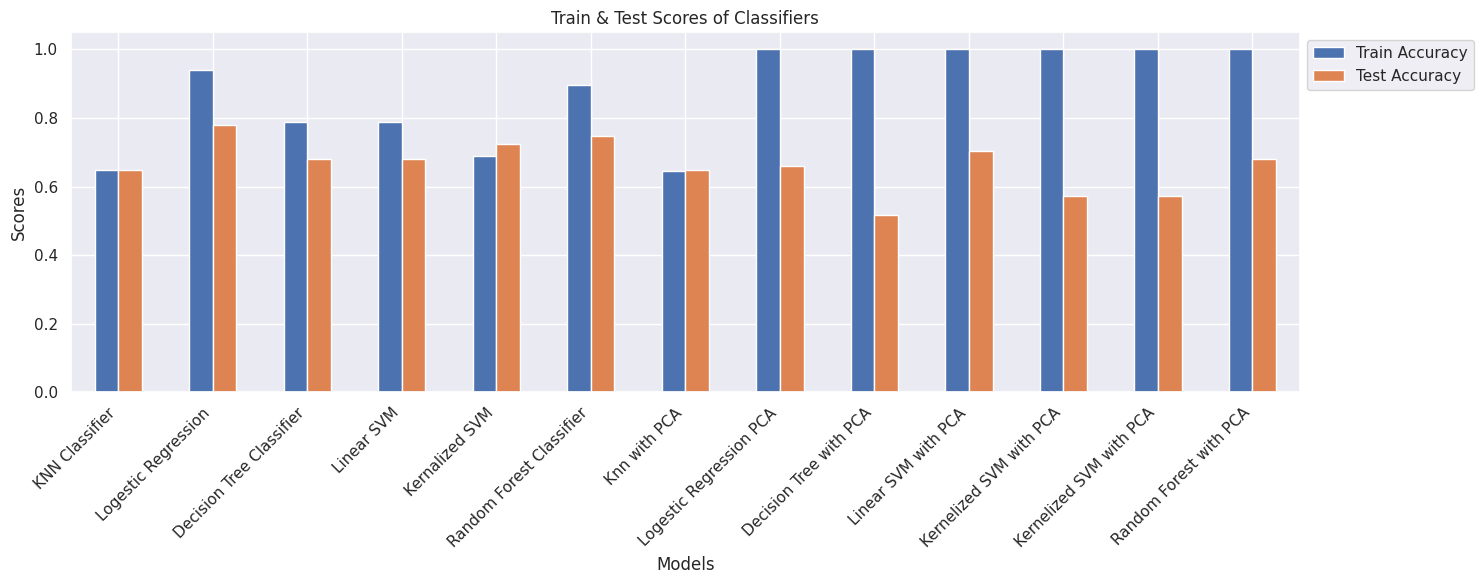

In [ ]:
import matplotlib.pyplot as plt

# Set 'Model' as the index for better plotting
plot_data = result.set_index('Model')

plot_data.plot(kind="bar", figsize=(15, 6))
plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show();

## Visualizing Class Distribution (Count Plot)

This code cell generates a count plot showing the distribution of instances across different classes in the `new_df` DataFrame.

## Preparing Values for Pie Chart

This code cell creates a new list `values` by taking the first 10 elements from the `la` list, extending it with three zeros, and then adding the remaining elements from `la`. This is done to align the values with the defined `class_names` for the pie chart.

## Visualizing Class Distribution (Pie Chart)

This code cell generates a pie chart to visualize the distribution of instances across the classes. It uses the `values` list (after applying a log10 transformation for better visualization of small counts) and the `class_names` as labels.

## Pair Plot of Selected Features by Sex

This code cell generates a pair plot for the 'Age', 'Sex', 'Height', and 'Weight' columns in the `final_df` DataFrame, with points colored according to the 'Sex' column. This helps visualize the relationships between these features for different sexes.

## Displaying Top 10 Heights

This code cell sorts the 'Height' column in descending order and displays the top 10 values.

## Correcting Outlier Height Values

This code cell replaces specific outlier values (608 and 780) in the 'Height' column with more reasonable values (108 and 180 respectively).

## Displaying Top 10 Weights

This code cell sorts the 'Weight' column in descending order and displays the top 10 values.

## Box Plot of QRS, P-R, Q-T, T, and P Intervals

This code cell generates a box plot for the 'QRS_Dur', 'P-R_Int', 'Q-T_Int', 'T_Int', and 'P_Int' columns in the `final_df` DataFrame to visualize their distributions and identify potential outliers.

## Bar Plot of Low P-R Interval Value Counts

This code cell generates a bar plot showing the counts of the 5 lowest occurring values in the 'P-R_Int' column.

## Bar Plot of High P-R Interval Value Counts

This code cell generates a bar plot showing the counts of the 5 highest occurring values in the 'P-R_Int' column.

## Box Plot of QRS, T, P, J, and Heart Rate

This code cell generates a box plot for the 'QRS', 'T', 'P', 'J', and 'Heart_Rate' columns in the `final_df` DataFrame to visualize their distributions and identify potential outliers.

## Box Plot of R', S', Int_Def, and Rag_R_Nom

This code cell generates a box plot for the 'R\'_Wave', 'S\'_Wave', 'Int_Def', and 'Rag_R_Nom' columns in the `final_df` DataFrame to visualize their distributions.

## Value Counts for S'_Wave

This code cell calculates and displays the value counts for the 'S\'_Wave' column in descending order.

## Value Counts for V101

This code cell calculates and displays the value counts for the 'V101' column in descending order.

## Value Counts for V201

This code cell calculates and displays the value counts for the 'V201' column in descending order.

## Value Counts for V301

This code cell calculates and displays the value counts for the 'V301' column in descending order.

## Value Counts for V501

This code cell calculates and displays the value counts for the 'V501' column in descending order.

## Box Plot of AVR Leads (190-199)

This code cell generates a box plot for a range of columns related to AVR leads (from 'AVR190' to 'AVR199') in the `final_df` DataFrame to visualize their distributions.

## Box Plot of AVL Leads (200-209)

This code cell generates a box plot for a range of columns related to AVL leads (from 'AVL200' to 'AVL209') in the `final_df` DataFrame to visualize their distributions.

## Box Plot of AVF Leads (210-219)

This code cell generates a box plot for a range of columns related to AVF leads (from 'AVF210' to 'AVF219') in the `final_df` DataFrame to visualize their distributions.

## Calculating Pearson Correlation with Target

This code cell calculates the Pearson correlation coefficient between each feature in the `final_df` DataFrame and the `target` variable.

## Splitting Data into Training and Testing Sets

This code cell splits the `final_df` (features) and `target` (target variable) into training and testing sets using `train_test_split`. 80% of the data is used for training and 20% for testing, with a `random_state` set for reproducibility.

## Feature Scaling

This code cell uses `StandardScaler` to standardize the features in both the training and testing sets. Standardization scales the data to have zero mean and unit variance, which is often necessary for many machine learning algorithms.

## Suppressing Warnings

This code cell imports the `warnings` module and filters out warnings to prevent them from being displayed in the output.

## Importing Evaluation Metrics

This code cell imports various evaluation metrics from `sklearn.metrics` that will be used to assess the performance of the classification models.

## Initializing Results DataFrame

This code cell initializes an empty pandas DataFrame named `result` with columns 'Model', 'Train Accuracy', and 'Test Accuracy' to store the performance scores of different models.